# IRIS Dataset Manipulations

In this task, I performed three main manipulations on the IRIS dataset:

1. **Rounded Sepal Length**:  
   Added a new column that contains the rounded value of each row's `Sepal.Length`.

2. **Conditional Character Extraction from Iris Name**:  
   Added a new column with the first letter of the `Species` name if the `Petal.Length` of that row is greater than the average `Petal.Length` for that species. Otherwise, it stores the last letter of the `Species` name.

3. **Histogram Visualization**:  
   Plotted a histogram of the `Petal.Length` feature to observe its distribution across the dataset.

### Importing the dataset

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder

columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv('iris.csv', names=columns)

df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## part a

In [2]:
df['sepal_length_rounded'] = df['sepal_length'].round()
df

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_rounded
0,5.1,3.5,1.4,0.2,setosa,5.0
1,4.9,3.0,1.4,0.2,setosa,5.0
2,4.7,3.2,1.3,0.2,setosa,5.0
3,4.6,3.1,1.5,0.2,setosa,5.0
4,5.0,3.6,1.4,0.2,setosa,5.0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,7.0
146,6.3,2.5,5.0,1.9,virginica,6.0
147,6.5,3.0,5.2,2.0,virginica,6.0
148,6.2,3.4,5.4,2.3,virginica,6.0


## part b

In [3]:
df['petal_length_avg'] = df.groupby('species')['petal_length'].transform('mean')

df['letter_column'] = df.apply(
    lambda row: row['species'][0] if row['petal_length'] > row['petal_length_avg'] else row['species'][-1],
    axis=1
)

df

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_rounded,petal_length_avg,letter_column
0,5.1,3.5,1.4,0.2,setosa,5.0,1.464,a
1,4.9,3.0,1.4,0.2,setosa,5.0,1.464,a
2,4.7,3.2,1.3,0.2,setosa,5.0,1.464,a
3,4.6,3.1,1.5,0.2,setosa,5.0,1.464,s
4,5.0,3.6,1.4,0.2,setosa,5.0,1.464,a
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,7.0,5.552,a
146,6.3,2.5,5.0,1.9,virginica,6.0,5.552,a
147,6.5,3.0,5.2,2.0,virginica,6.0,5.552,a
148,6.2,3.4,5.4,2.3,virginica,6.0,5.552,a


In [ ]:
## part c

### Why I Chose `bins=12`

With 150 data points, common binning rules suggest:

- **Sturges' Rule** → 9 bins  
- **Square Root Rule** → 13 bins  

I chose **12 bins** as a balanced value within this range. 
It also results in clean 0.5-width intervals over the [1, 7] petal length range, making the histogram both informative and easy to read.

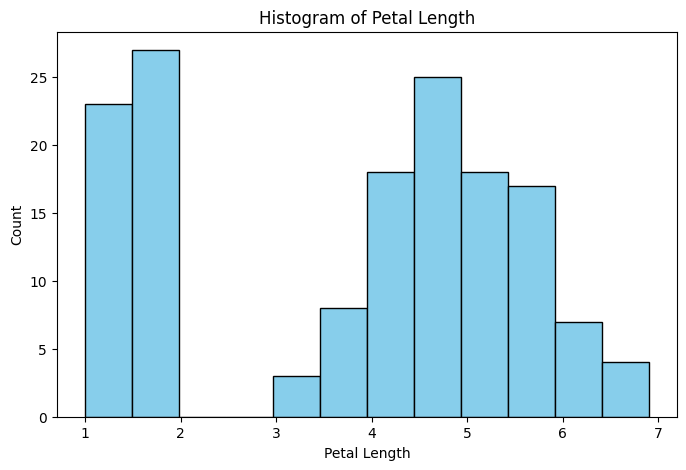

In [4]:
plt.figure(figsize=(8,5))
plt.hist(df['petal_length'], bins=12, color='skyblue', edgecolor='black')
plt.title('Histogram of Petal Length')
plt.xlabel('Petal Length')
plt.ylabel('Count')
plt.grid(False)
plt.show()

In [ ]:
## bonus 1

In [5]:
df = df.drop(['letter_column', 'sepal_length_rounded', 'petal_length_avg'], axis=1)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


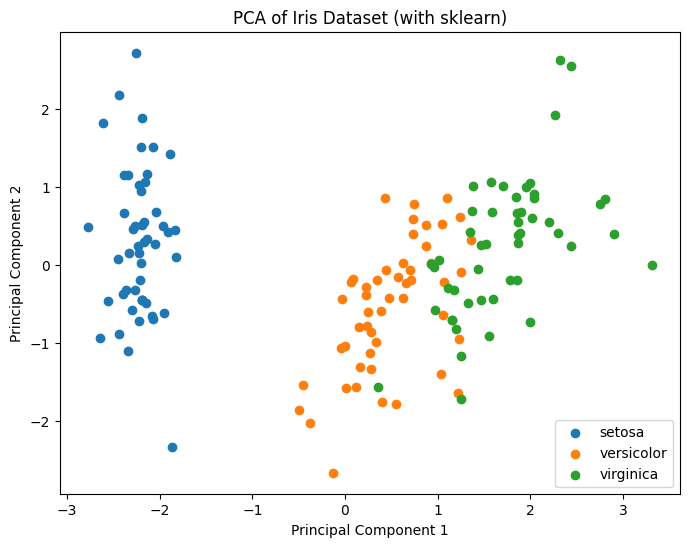

In [6]:
# 1. Extract features and target
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[features]
y = df['species']

# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fit PCA and transform data to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Create DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['species'] = y

# 5. Plot the PCA result
plt.figure(figsize=(8, 6))
for species in pca_df['species'].unique():
    subset = pca_df[pca_df['species'] == species]
    plt.scatter(subset['PC1'], subset['PC2'], label=species)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset (with sklearn)')
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
## bonus 2

### K-mean clusters 
I will cluster the points to 3 groups (like the species) and compare the points for the real ones 

Adjusted Rand Index (ARI): 0.620


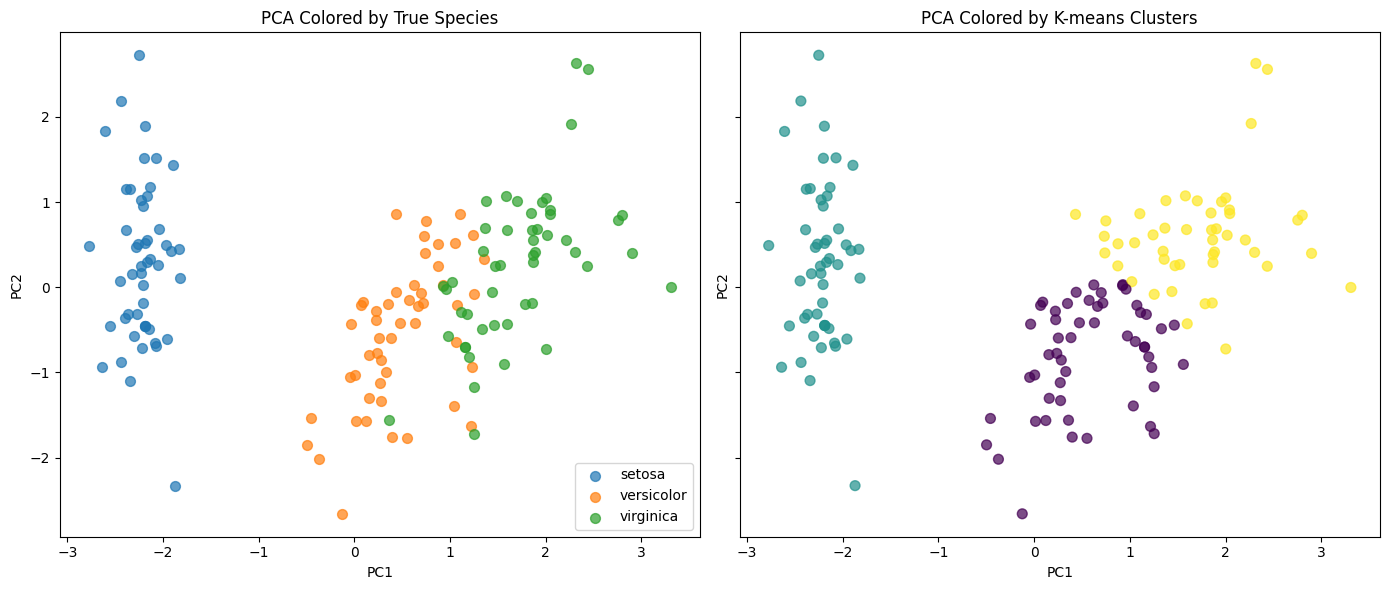

In [18]:
# Encode species to numbers
le = LabelEncoder()
pca_df['species_num'] = le.fit_transform(pca_df['species'])

X_pca = pca_df[['PC1', 'PC2']].values
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)
pca_df['cluster'] = clusters

# Calculate ARI (Adjusted Rand Index)
ari = adjusted_rand_score(pca_df['species_num'], pca_df['cluster'])
print(f"Adjusted Rand Index (ARI): {ari:.3f}")

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# Left: true species
for species in pca_df['species'].unique():
    subset = pca_df[pca_df['species'] == species]
    axes[0].scatter(subset['PC1'], subset['PC2'], label=species, alpha=0.7, s=50)
axes[0].set_title('PCA Colored by True Species')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].legend()
axes[0].grid(False)

# Right: clusters
scatter = axes[1].scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['cluster'], cmap='viridis', alpha=0.7, s=50)
axes[1].set_title('PCA Colored by K-means Clusters')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].grid(False)

plt.tight_layout()
plt.show()